### sklearn.datasets.make_classification

** sklearn.datasets.make_classification(_n_samples=100_, _n_features=20_, _*_, _n_informative=2_, _n_redundant=2_, _n_repeated=0_, _n_classes=2_, _n_clusters_per_class=2_, _weights=None_, _flip_y=0.01_, _class_sep=1.0_, _hypercube=True_, _shift=0.0_, _scale=1.0_, _shuffle=True_, _random_state=None_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/datasets/_samples_generator.py#L40)

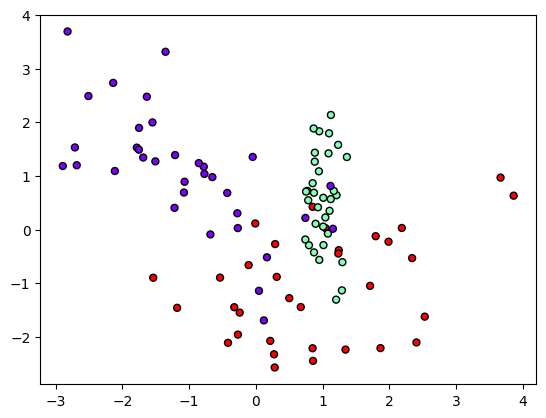

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 2차원 시각화를 위해서 feature 2개 결정값 클래스는 가지 유형의 classification 샘플 데이터 생성
x_features, y_labels = make_classification(n_features=2,n_redundant=0, n_informative=2, 
                                        n_classes=3, n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(x_features[:,0], x_features[:,1],marker="o",c=y_labels, s= 25, cmap="rainbow",
           edgecolors="k")

In [21]:
import numpy as np

# classification의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, x, y):
    fig, ax = plt.subplots()
    
    #학습 데이터 scatter plot으로 나타내기
    ax.scatter(x[:,0], x[:,1], c=y,s=25, cmap = "rainbow", edgecolor = 'k',
              clim= (y.min(), y.max()), zorder = 3)
    ax.axis = ("tight")
    ax.axis = ('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    #호출 파라미터로 돌아온 training 데이터로 model 학습
    model.fit(x,y)
    # meshgrid 형태로 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200)
                        ,np.linspace(ylim_start,ylim_end, num=200))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, z, alpha= 0.3,
                          levels = np.arange(n_classes +1) - 0.5,
                          cmap = "rainbow", clim= (y.min(), y.max()),
                          zorder= 1)
    
    

C:\Users\juno\AppData\Local\Temp\ipykernel_24140\486500513.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, z, alpha= 0.3,


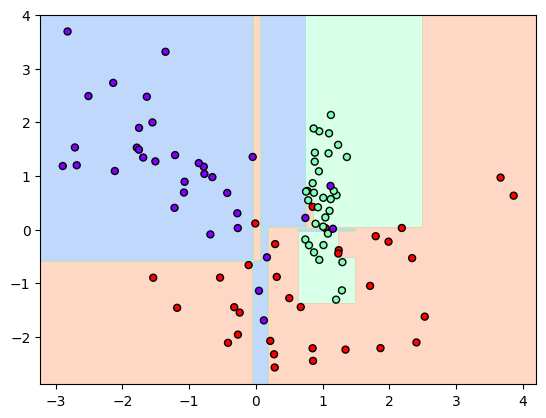

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

C:\Users\juno\AppData\Local\Temp\ipykernel_24140\486500513.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, z, alpha= 0.3,


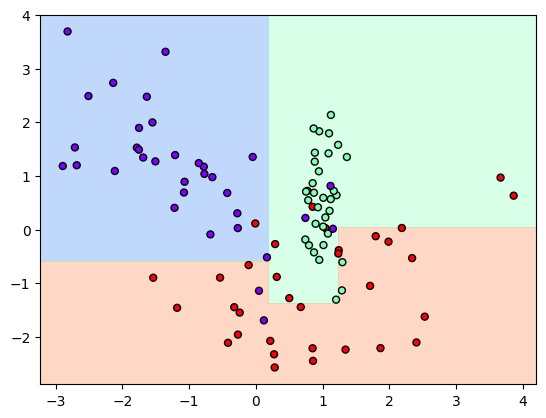

In [23]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)